# Wizualizacja danych

**Zadanie 1**  
Narysuj wykres średniej rocznej liczby pasażerów w zależności od czasu dla danych z ramki `flights`.

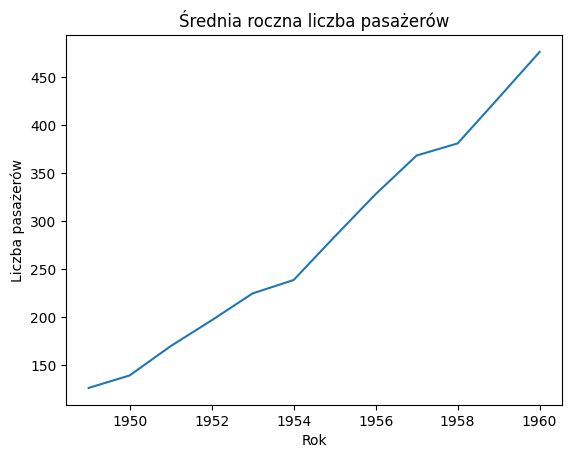

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

flights = sns.load_dataset('flights')
flights_avg = flights.groupby('year')['passengers'].mean()
plt.plot(flights_avg.index, flights_avg.values)
plt.title('Średnia roczna liczba pasażerów')
plt.xlabel('Rok')
plt.ylabel('Liczba pasażerów')
plt.show()

**Zadanie 2**  
Znajdź równania parametryczne krzywej ilustrującej serce i narysuj tę krzywą.

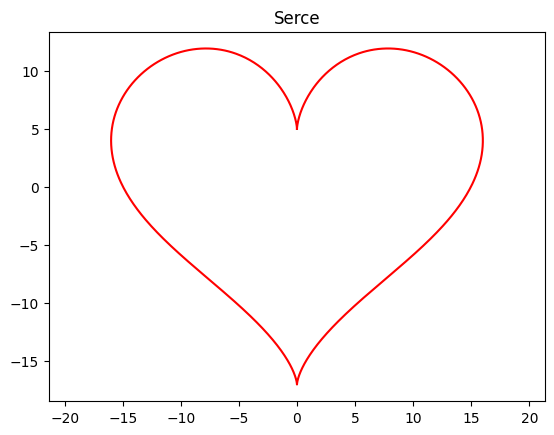

In [3]:
import numpy as np
t = np.linspace(0, 2*np.pi, 1000)
x = 16 * np.sin(t)**3
y = 13 * np.cos(t) - 5 * np.cos(2*t) - 2 * np.cos(3*t) - np.cos(4*t)
plt.plot(x, y, color='red')
plt.title('Serce')
plt.axis('equal')
plt.show()

**Zadanie 3**  
Przetestuj różne napisy formatujące. Narysuj wykres funkcji  $f(x) = \sin(x)$ przy użyciu:
* zielonych linii typu „kropka-kreska”;
* niebieskich trójkątów;
* czarnych linii przerywanych oraz gwiazdek.


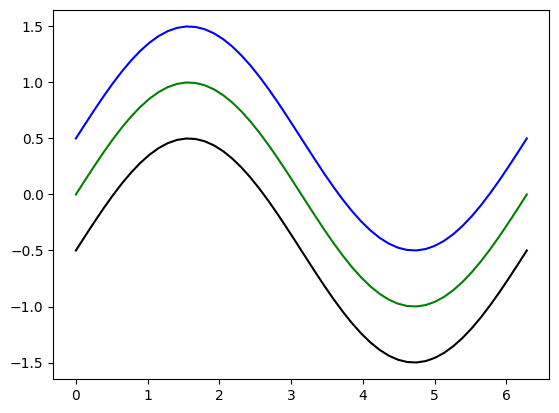

In [18]:
x = np.linspace(0, 2*np.pi, 50)
plt.plot(x, np.sin(x), 'g')
plt.plot(x, np.sin(x)+0.5, 'b')
plt.plot(x, np.sin(x)-0.5, 'k')
plt.show()

**Zadanie 4**
Narysuj koło o środku w punkcie $(0,0)$ i promieniu $2$. Powinno być ono wypełnione półprzezroczystą barwą zieloną, mieć wyraźnie zaznaczony brzeg i nie wyglądać jak elipsa.

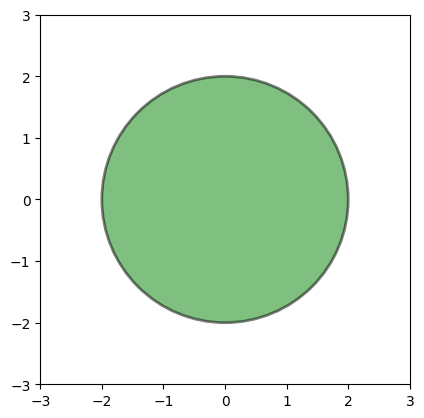

In [5]:
circle = plt.Circle((0, 0), 2, color='green', alpha=0.5, ec='black', lw=2)
fig, ax = plt.subplots()
ax.add_patch(circle)
ax.set_aspect('equal')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
plt.show()

**Zadanie 5**
Narysuj wykres funkcji $ \tan(x) $ na przedziale $[-2\pi,\, 2\pi]$. Zamieść na osi etykiety postaci $\dots,\; -\pi,\; -\tfrac{\pi}{2},\; 0,\; \tfrac{\pi}{2},\; \pi,\; \dots$. Umieść legendę o białym tle w lewym dolnym rogu. Zadbaj o brak „asymptot” pionowych.

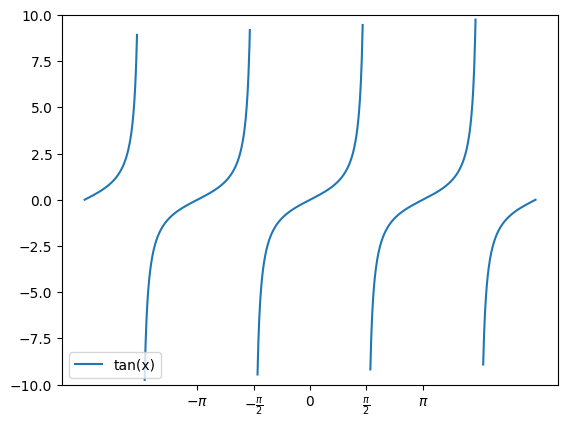

In [6]:
x = np.linspace(-2*np.pi, 2*np.pi, 1000)
y = np.tan(x)
y[np.abs(y) > 10] = np.nan
plt.plot(x, y, label='tan(x)')
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], [r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])
plt.ylim(-10, 10)
plt.legend(loc='lower left', frameon=True, facecolor='white')
plt.show()

**Zadanie 6**  
Narysuj wykres kołowy oraz słupkowy podsumowujące zmienną `smoker` z ramki danych `tips`.

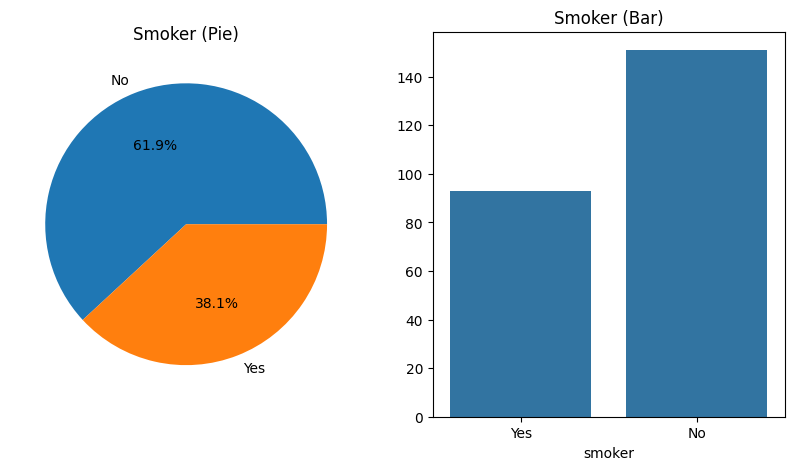

In [7]:
tips = sns.load_dataset('tips')
smoker_counts = tips['smoker'].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%')
ax1.set_title('Smoker (Pie)')
sns.barplot(x=smoker_counts.index, y=smoker_counts.values, ax=ax2)
ax2.set_title('Smoker (Bar)')
plt.show()

**Zadanie 7**  
Utwórz wykres skrzynkowy dla procentowego udziału napiwku w całkowitej wartości rachunku na podstawie ramki danych `tips`.

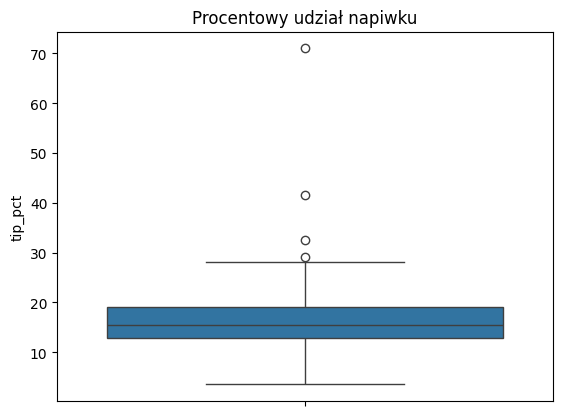

In [8]:
tips['tip_pct'] = tips['tip'] / tips['total_bill'] * 100
sns.boxplot(y=tips['tip_pct'])
plt.title('Procentowy udział napiwku')
plt.show()

**Zadanie 8**  
Utwórz wykres skrzynkowy dla procentowego udziału napiwku w całkowitej wartości rachunku w rozbiciu na podgrupy generowane przez kombinacje `sex` i `day`.

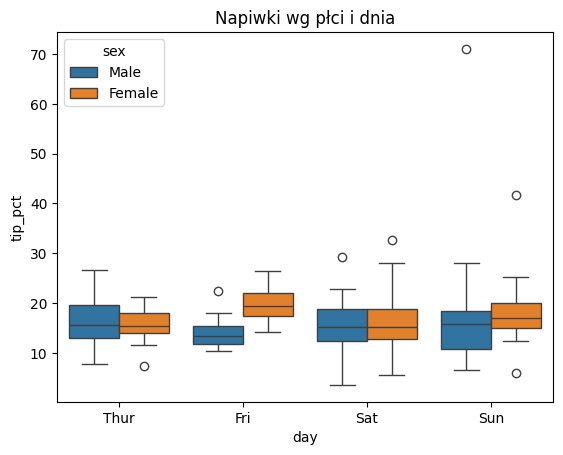

In [9]:
sns.boxplot(x='day', y='tip_pct', hue='sex', data=tips)
plt.title('Napiwki wg płci i dnia')
plt.show()

**Zadanie 9**  
Narysuj histogramy dla procentowego udziału napiwku w zależności od płci klienta na podstawie ramki danych `tips`.

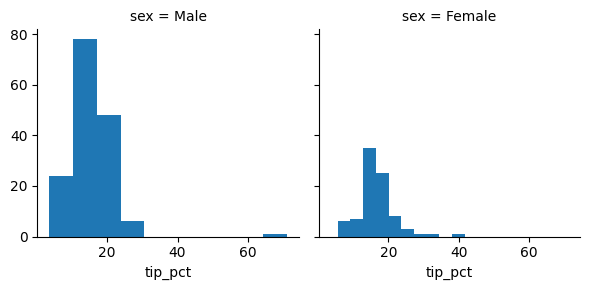

In [10]:
g = sns.FacetGrid(tips, col="sex")
g.map(plt.hist, "tip_pct")
plt.show()

**Zadanie 10**
Odczytaj dane z pliku *answers.txt*, a następnie, korzystając z biblioteki `matplotlib`, przedstaw dane na wykresie. Zsumuj wszystkie odpowiedzi dla każdego pytania i przedstaw je w następujący sposób: dla osi Y ustaw numery pytań, a dla osi X sumę odpowiedzi na każde pytanie. Zaznacz innym kolorem niż domyślny dwa najlepsze i dwa najgorsze wyniki dla przedstawionych pytań. Pamiętaj, aby odpowiednio opisać wykres.

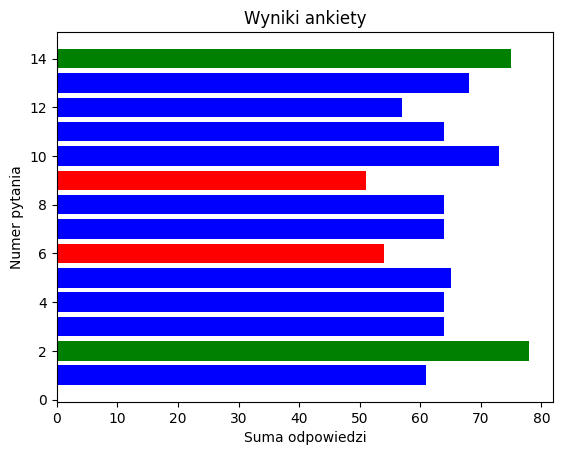

In [11]:
import pandas as pd
data = pd.read_csv('answers.txt', header=None, index_col=0)
sums = data.sum(axis=0)
colors = ['blue'] * len(sums)
sorted_indices = sums.argsort()
for i in sorted_indices[-2:]: colors[i] = 'green' # Best
for i in sorted_indices[:2]: colors[i] = 'red' # Worst
plt.barh(sums.index, sums.values, color=colors)
plt.xlabel('Suma odpowiedzi')
plt.ylabel('Numer pytania')
plt.title('Wyniki ankiety')
plt.show()

**Zadanie 11**
Odczytaj dane z pliku `pojazdy.xlsx` i wyświetl je na wykresie kołowym ([pie](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py)). Plik zawiera dane o pojazdach zarejestrowanych w latach 2022 i 2023. Stwórz dwa wykresy, które będą reprezentować dane za rok 2022 i 2023. Na wykresach wyświetl następujące rodzaje pojazdów, które zostały zarejestrowane: `AUTOBUS`, `CIĄGNIK ROLNICZY`, `CIĄGNIK SAMOCHODOWY`, `MOTOCYKL`, `NACZEPA CIĘŻAROWA`, `PRZYCZEPA CIĘŻAROWA`, `SAMOCHÓD CIĘŻAROWY`, `SAMOCHÓD OSOBOWY`. Pamiętaj, aby każdy wykres opisać i dodać odpowiednie informacje.



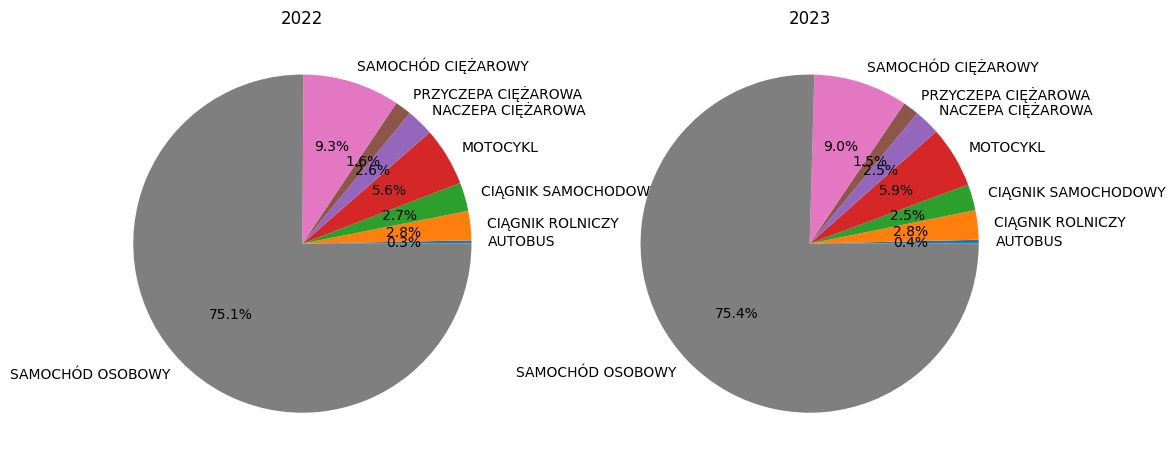

In [12]:
df_p = pd.read_excel('pojazdy.xlsx')
target_types = ['AUTOBUS', 'CIĄGNIK ROLNICZY', 'CIĄGNIK SAMOCHODOWY', 'MOTOCYKL', 'NACZEPA CIĘŻAROWA', 'PRZYCZEPA CIĘŻAROWA', 'SAMOCHÓD CIĘŻAROWY', 'SAMOCHÓD OSOBOWY']
df_p = df_p[df_p['RODZAJ'].isin(target_types)]
cols_2022 = [c for c in df_p.columns if '2022' in c]
cols_2023 = [c for c in df_p.columns if '2023' in c]
sum_2022 = df_p[cols_2022].sum(axis=1)
sum_2023 = df_p[cols_2023].sum(axis=1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.pie(sum_2022, labels=df_p['RODZAJ'], autopct='%1.1f%%')
ax1.set_title('2022')
ax2.pie(sum_2023, labels=df_p['RODZAJ'], autopct='%1.1f%%')
ax2.set_title('2023')
plt.show()

**Zadanie 12**
Wyobraź sobie, że masz siatkę 2D (dwuwymiarową tablicę) reprezentującą temperatury na powierzchni prostokątnego materiału. Każda komórka siatki zawiera temperaturę w danym punkcie materiału. Wykorzystując bibliotekę `matplotlib`, zapoznaj się z wykresem typu [colorbar](https://matplotlib.org/stable/gallery/images_contours_and_fields/colormap_interactive_adjustment.html#sphx-glr-gallery-images-contours-and-fields-colormap-interactive-adjustment-py) i wykorzystaj go do zaprezentowania symulacji rozchodzenia się ciepła.

Równanie przewodnictwa cieplnego w dwóch wymiarach może być uproszczone i przedstawione jako iteracyjny wzór:
$$
T^{(n+1)}_{i,j} = \frac{1}{4} \bigl(T^{(n)}_{i+1,j} + T^{(n)}_{i-1,j} + T^{(n)}_{i,j+1} + T^{(n)}_{i,j-1}\bigr)
$$

Oznacza to, że temperatura w punkcie $T_{i,j}$ w kolejnym kroku czasu $n+1$ jest średnią z temperatur sąsiednich punktów w bieżącym kroku $n$. Brzegi siatki mają stałą temperaturę (warunki brzegowe).

Zaimplementuj model symulacji przepływu ciepła na siatce 2D o rozmiarze $40 \times 40$. Ustaw stałą wartość temperaturową na górnym brzegu równą $100^{\circ}C$, a na dolnym brzegu $0^{\circ}C$. Stwórz symulację dla $500$ kroków i przedstaw rozkład temperatury materiału na wykresie co 50. krok symulacji.

Pamiętaj, aby opisać każdy wykres, dodając odpowiednie informacje.

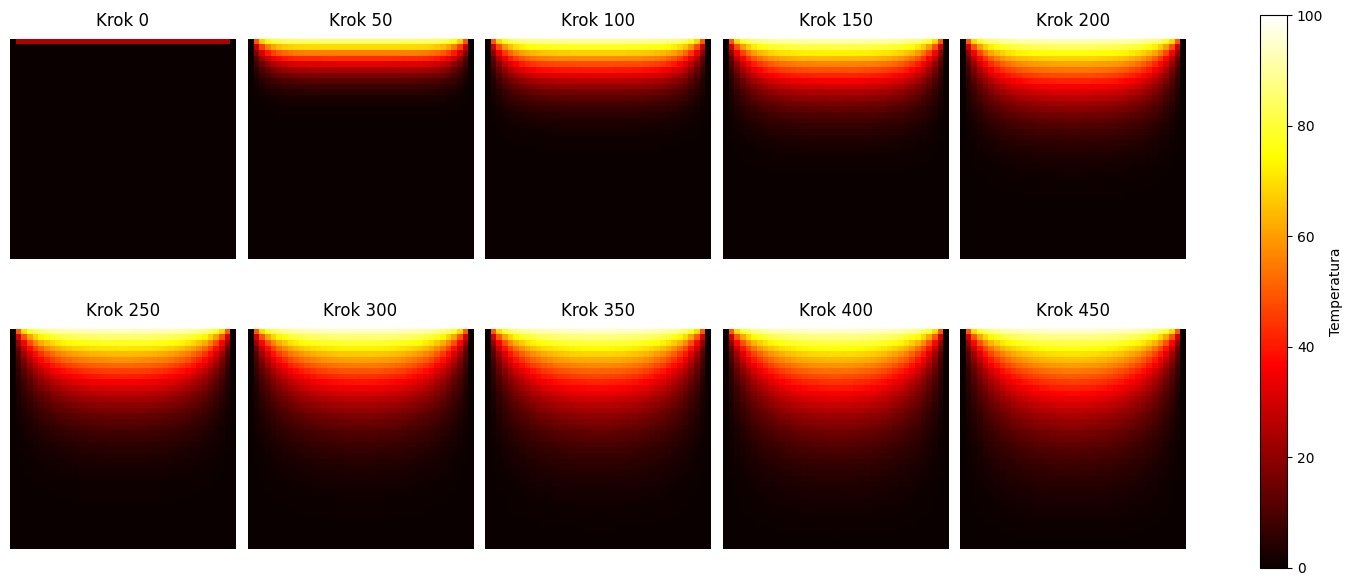

In [13]:
N = 40
steps = 500
T = np.zeros((N, N))
T[0, :] = 100
T[-1, :] = 0

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()
plot_idx = 0

for n in range(steps):
    T[1:-1, 1:-1] = 0.25 * (T[2:, 1:-1] + T[:-2, 1:-1] + T[1:-1, 2:] + T[1:-1, :-2])
    if n % 50 == 0:
        im = axes[plot_idx].imshow(T, cmap='hot', interpolation='nearest', vmin=0, vmax=100)
        axes[plot_idx].set_title(f'Krok {n}')
        axes[plot_idx].axis('off')
        plot_idx += 1

plt.tight_layout()
fig.colorbar(im, ax=axes.ravel().tolist(), label='Temperatura')
plt.show()

**Zadanie 13**
Odczytaj dane pogodowe z pliku *city.zip* i przedstaw następujące dane na wykresie. Odczytaj dane data pomiaru `time`, sumie opadów deszczu `rain_sum` i średnia temperatura `temperature_2m_mean`. Ustaw dwa wykresy na jednej stronie dla każdego miasta, nie zapomnij o opisaniu wykresu. Jednostki pomiarowe dla temperatury temperatura $C^o$ i opadów deszczu $mm$. Dla osi X ustaw odczytane daty, zapoznaj się z metodami `plt.gca().xaxis.set_major_formatter()` i `plt.gca().xaxis.set_major_locator()`, które pomogą przy formatowaniu dat na wykresach.

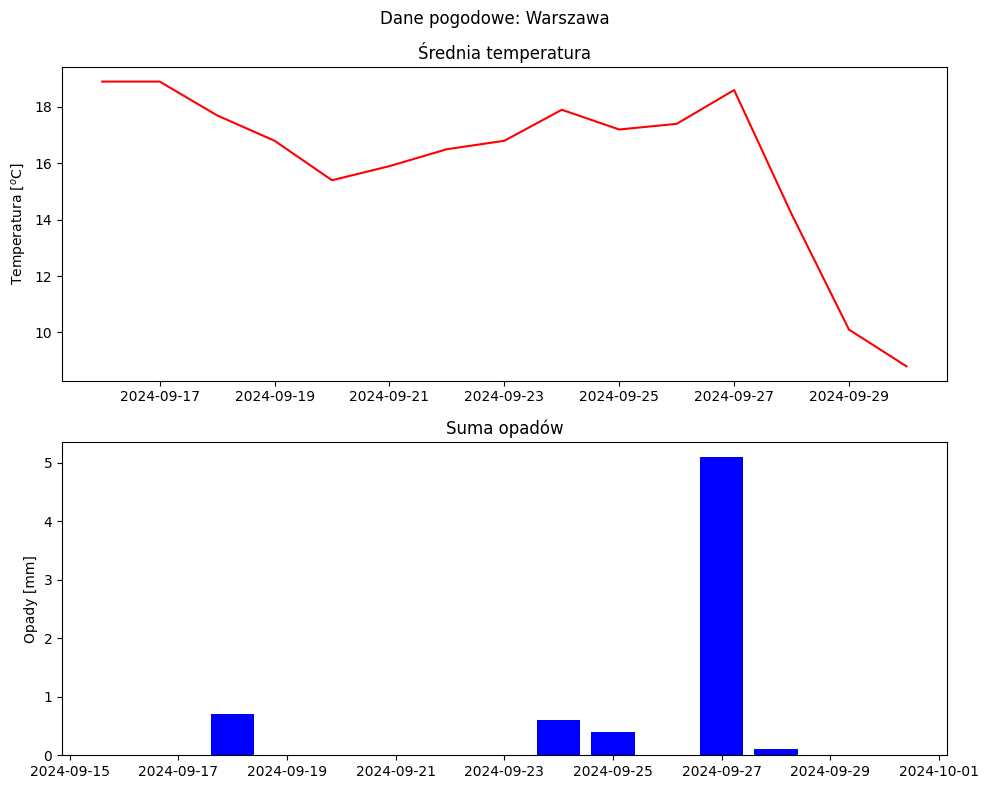

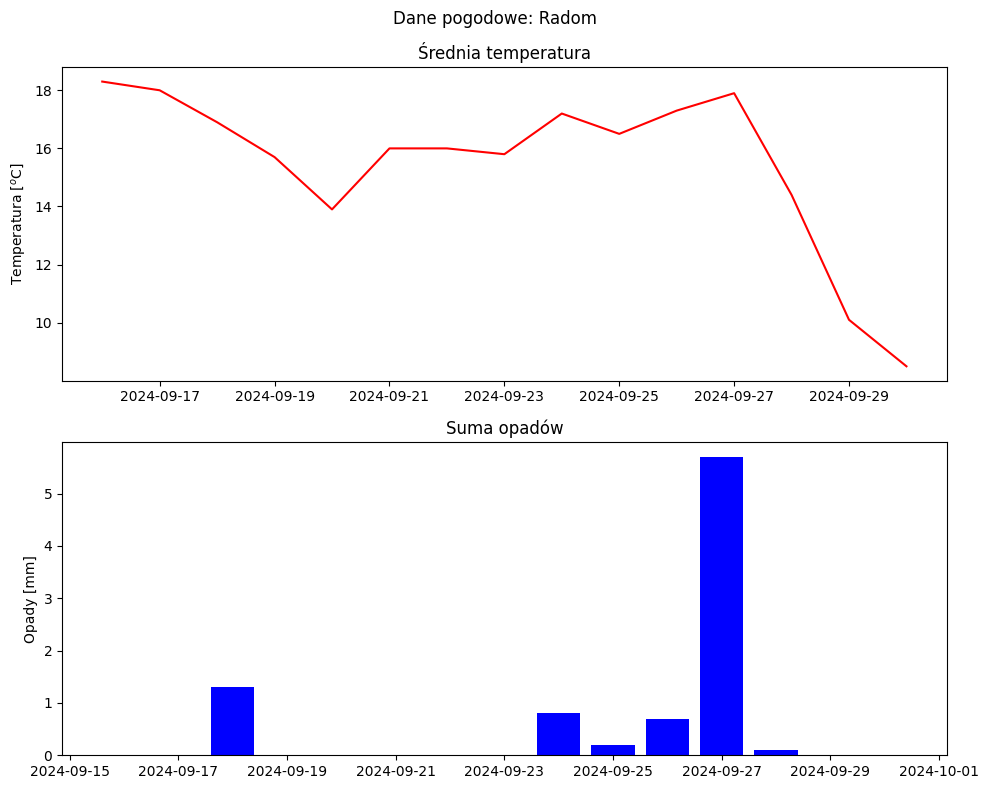

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

for city, file in [('Warszawa', 'city/Warszawa.csv'), ('Radom', 'city/Radom.xml')]:
    df = pd.read_csv(file, sep=';') if file.endswith('.csv') else pd.read_xml(file)
    df['time'] = pd.to_datetime(df['time'])
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    fig.suptitle(f'Dane pogodowe: {city}')
    
    ax1.plot(df['time'], df['temperature_2m_mean'], color='red')
    ax1.set_title('Średnia temperatura')
    ax1.set_ylabel('Temperatura [$^o$C]')
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
    
    ax2.bar(df['time'], df['rain_sum'], color='blue')
    ax2.set_title('Suma opadów')
    ax2.set_ylabel('Opady [mm]')
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax2.xaxis.set_major_locator(mdates.AutoDateLocator())
    
    plt.tight_layout()
    plt.show()